In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import pylab as pl
plt.style.use('ggplot')
%matplotlib inline
import sklearn.metrics as metric
from sklearn.linear_model import LogisticRegression

df=pd.read_csv('C:/Users/User/Desktop/dataframe/Dataset/ORGANICS.csv',encoding="cp1251")



#объекты и несщественные убираем
x = df[[c for c in df.columns if df[c].dtype.name != 'object' and c !="ID"and c !="TargetBuy" and c != "TargetAmt" ]]
print(x)
y = df.values[::,11]


data = df.drop(columns=['ID', 'TargetAmt'])

#замена на медианы и моды 
data['PromTime'].fillna(data['PromTime'].median(), inplace=True)
data['DemCluster'].fillna(data['DemCluster'].median(), inplace=True)
data['DemAge'].fillna(data['DemAge'].median(), inplace=True)
data['DemAffl'].fillna(data['DemAffl'].median(), inplace=True)

data['DemGender'].fillna(data['DemGender'].mode()[0], inplace=True) 
data['DemClusterGroup'].fillna(data['DemClusterGroup'].mode()[0], inplace=True)
data['DemReg'].fillna(data['DemReg'].mode()[0], inplace=True)
data['DemTVReg'].fillna(data['DemTVReg'].mode()[0], inplace=True)





#Преобразуем категориальные переменные в фиктивные / индикаторные переменные.
dummy = pd.get_dummies(data)
dummy = dummy[[column for column in dummy if column != 'TargetBuy'] + ['TargetBuy']]




x = dummy.iloc[:, :-1].values
y = dummy['TargetBuy'].values



X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

y_test = y_test.astype(int)
y_train = y_train.astype(int)

tree = DecisionTreeClassifier(max_depth=5, criterion = "entropy", random_state=0)
tree.fit(X_train, y_train)

       DemAffl  DemAge  DemCluster  PromSpend  PromTime
0         10.0    76.0        16.0   16000.00       4.0
1          4.0    49.0        35.0    6000.00       5.0
2          5.0    70.0        27.0       0.02       8.0
3         10.0    65.0        51.0       0.01       7.0
4         11.0    68.0         4.0       0.01       8.0
...        ...     ...         ...        ...       ...
22218     13.0    65.0         9.0    1500.00       5.0
22219     15.0    73.0        34.0    6053.06      12.0
22220      9.0    70.0        15.0    6000.00       5.0
22221     11.0    66.0         8.0    5000.00       5.0
22222      3.0    75.0        53.0    6000.00       2.0

[22223 rows x 5 columns]


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

[[4809  266]
 [1008  584]]
0.8089095545222739
0.36683417085427134
0.6870588235294117
0.4782964782964783
balanced_accuracy_score: 0.6572101888754115
cohen_kappa_score: 0.3742817922011219
matthews_corrcoef: 0.40192150632003193


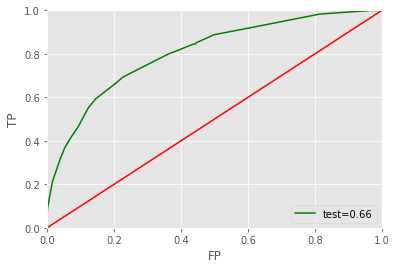

True Negative Rate: 0.9475862068965517
False Positive Rate: 0.05241379310344828


In [36]:
cm = metric.confusion_matrix(y_test, tree.predict(X_test))

print (cm)
preds = tree.predict(X_test) 

print(metric.accuracy_score(y_test, preds))
print(metric.recall_score(y_test, preds))
print(metric.precision_score(y_test, preds))
print(metric.f1_score(y_test, preds))
print('balanced_accuracy_score:',metric.balanced_accuracy_score(y_test, preds))
print('cohen_kappa_score:',metric.cohen_kappa_score(y_test, preds))
print('matthews_corrcoef:',metric.matthews_corrcoef(y_test, preds))


pred_prob = tree.predict_proba(X_test)
preds = pred_prob[:, -1]
roc_auc = metric.auc(fpr, tpr)
fpr, tpr, threshold = metric.roc_curve(y_test, preds)


#Roc кривая
pyp.plot(fpr, tpr, 'green', label='test=%0.2f' % roc_auc)
pyp.legend(loc = 'lower right')
pyp.plot([0, 1], [0, 1],'r')
pyp.xlim([0, 1])
pyp.ylim([0, 1])
pyp.ylabel('True Negative Rate')
pyp.xlabel('False Positive Rate')
pyp.show()

tn, fp, fn, tp = cm.ravel()
TNR = tn / (tn + fp)
FPR = fp / (tn + fp)
print('True Negative Rate:', TNR)
print('False Positive Rate:', FPR)


In [41]:
balanced_tree = DecisionTreeClassifier(max_depth=5, criterion = "entropy", random_state=0,class_weight='balanced')
balanced_tree.fit(X_train, y_train)

balanced_preds = balanced_tree.predict(X_test)

y_pred = tree.predict(X_test)

print('unbalanced:')
print(classification_report(y_test, y_pred))
print()
print('balanced::')
print(classification_report(y_test, balanced_preds))

print('unbalanced:')
print('   True Negative Rate:', TNR)
print('   False Positive Rate:', FPR)
print()

balanced_matrix = confusion_matrix(y_test, balanced_preds)
tn, fp, fn, tp = balanced_matrix.ravel()
TNR = tn / (tn + fp)
FPR = fp / (tn + fp)
print('balanced:')
print('   True Negative Rate:', TNR)
print('   False Positive Rate:', FPR)

Unbalanced:
              precision    recall  f1-score   support

           0       0.83      0.95      0.88      5075
           1       0.69      0.37      0.48      1592

    accuracy                           0.81      6667
   macro avg       0.76      0.66      0.68      6667
weighted avg       0.79      0.81      0.79      6667


balanced::
              precision    recall  f1-score   support

           0       0.89      0.77      0.83      5075
           1       0.49      0.70      0.57      1592

    accuracy                           0.75      6667
   macro avg       0.69      0.73      0.70      6667
weighted avg       0.79      0.75      0.77      6667

Unbalanced:
   True Negative Rate: 0.7706403940886699
   False Positive Rate: 0.22935960591133006

balanced::
   True Negative Rate: 0.7706403940886699
   False Positive Rate: 0.22935960591133006


In [ ]:
print('unbalanced set:')
print('   Коэффициент Мэттьюса:', matthews_corrcoef(y_test, y_pred))
print('unbalanced set:')
print('   Коэффициент Мэттьюса:', matthews_corrcoef(y_test, balanced_preds))
print()
print('unbalanced set:')
print(' cohen_kappa_score:', cohen_kappa_score(y_test, y_pred))
print('balanced set:')
print(' cohen_kappa_score:', cohen_kappa_score(y_test, balanced_preds))
print()
print('unbalanced set::')
print(' unbalanced accuracy  :', balanced_accuracy_score(y_test, y_pred))
print('balanced set:')
print(' unbalanced accuracy:', balanced_accuracy_score(y_test, balanced_preds))